In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing dataset
dataset = pd.read_csv('datasets/50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values


from sklearn.compose import ColumnTransformer
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = ColumnTransformer(transformers =[('encoder',OneHotEncoder(),[3])] , remainder = 'passthrough')
X = np.array(onehotencoder.fit_transform(X))

# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Avoiding dummy variable trap
X = X[:, 1:]

# Applying multiple linear regression on all features
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print('Model score: '+str(regressor.score(X_test,Y_test)))

# Predicting re results
y_pred = regressor.predict(X_test)


Model score: 0.934706847328222


In [2]:



# Creating automated backward elimination function with p-values
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(Y, x).fit()
    regressor_OLS.summary()
    return x
 
# Applying the backward elimination 
SL = 0.05
X_opt = X[:,[0,1,2,3,4,5]]
X_opt = np.array(X_opt, dtype=float)


X_Modeled = backwardElimination(X_opt, SL)
regressor_OLS = sm.OLS(endog = Y, exog = X_Modeled).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 22 May 2020   Prob (F-statistic):           3.50e-32
Time:                        20:43:55   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# Creating automated backward elimination function with p-values and adjusted r-sqaured
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(Y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
# Applying the backward elimination 
SL = 0.05
X_opt = X[:,[0,1,2,3,4,5]]
X_opt = np.array(X_opt, dtype=float)


X_Modeled = backwardElimination(X_opt, SL)
# regressor_OLS = sm.OLS(endog = Y, exog = X_Modeled).fit()
# regressor_OLS.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Fri, 22 May 2020   Prob (F-statistic):           7.29e-31
Time:                        20:43:55   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.744e+04   3008.359      9.122      0.0

In [4]:
# X_Modeled = X_Modeled[:,:-1]
# X_Modeled

In [5]:
# Splitting new dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Modeled, Y, test_size = 0.2, random_state = 0)

# Applying linear regression model
from sklearn.linear_model import LinearRegression
regressor_new = LinearRegression()
regressor_new.fit(X_train, Y_train)
print('Model score: '+str(regressor_new.score(X_test,Y_test)))

Model score: 0.946940327780924


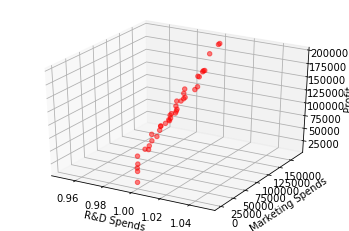

In [6]:
# Prediting test set results
y_pred_new = regressor_new.predict(X_test)

# Visualizing the results
x_surf, y_surf = np.meshgrid(np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 10),
                             np.linspace(X_train[:, 2].min(), X_train[:, 2].max(), 10))
z_surf = np.asarray(np.meshgrid(np.linspace(Y_train.min(), Y_train.max(), 100)))
onlyX = pd.DataFrame({'R&D Spend': x_surf.ravel(), 'Marketing': y_surf.ravel()})
onlyY = pd.DataFrame({'Profit': z_surf.ravel()})
surf_regressor = LinearRegression()
surf_regressor.fit(onlyX, onlyY)
fittedY=surf_regressor.predict(onlyX)

from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 1], X_train[:, 2], Y_train, c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('R&D Spends')
ax.set_ylabel('Marketing Spends')
ax.set_zlabel('Profit')
plt.show() 